<a href="https://colab.research.google.com/github/Afrah333333/deep-learning/blob/main/Activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neual Networks

In [59]:
!pip3 install torch torchvision

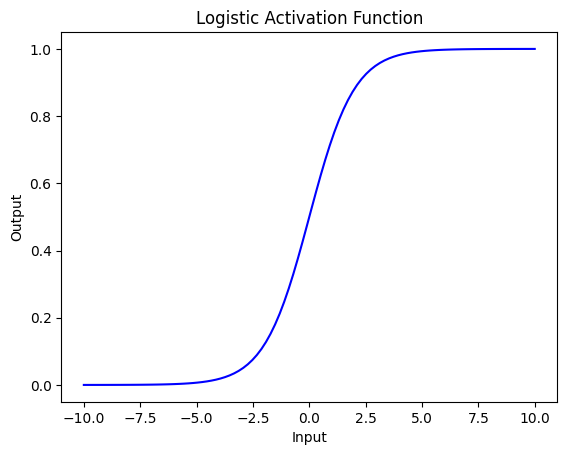

In [60]:
#sigmoid
import torch
import matplotlib.pyplot as plt

# create a PyTorch tensor
x = torch.linspace(-10, 10, 100)

# apply the logistic activation function to the tensor
#y = torch.sigmoid(x)
y= 1 / (1 + torch.exp(-x))

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Logistic Activation Function')
plt.show()

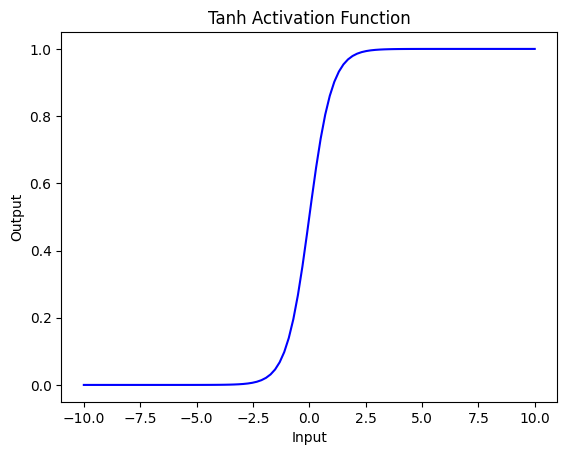

In [61]:
#Tanh
#y = torch.tanh(x)
y= 1 - torch.exp(-2*x) / (1 + torch.exp(-2*x))

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh Activation Function')
plt.show()

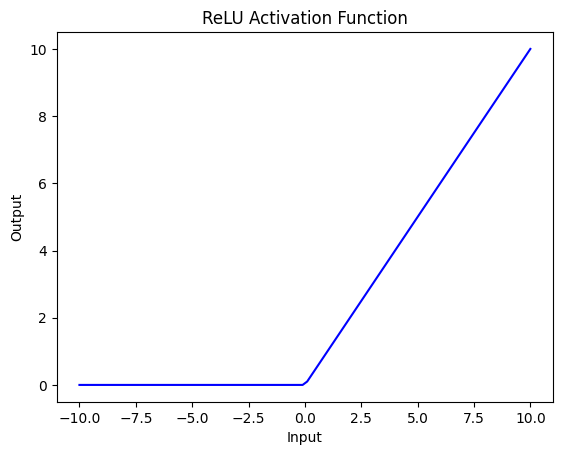

In [62]:
#ReLU
#y = torch.relu(x)
y= torch.maximum(torch.tensor(0),x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation Function')
plt.show()

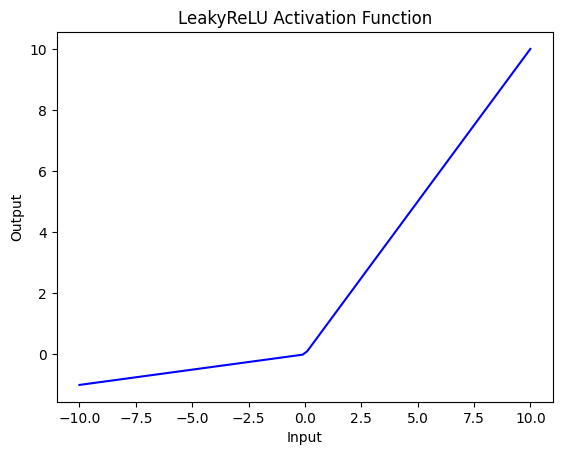

In [77]:
#leaky relu

y= torch.maximum(torch.tensor(0.1)*x,x)

# plot the results with a custom color
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('LeakyReLU Activation Function')
plt.show()

In [70]:

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load the FashionMNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='data/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 26421880/26421880 [00:01<00:00, 13986003.19it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273370.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5006828.27it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23806259.09it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [71]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_function):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.activation_function(self.layer1(x))
        x = self.activation_function(self.layer2(x))
        x = self.layer3(x)
        return x

In [72]:
def train(network, data_loader, criterion, optimizer, device):
    network.train()
    running_loss = 0.0

    for data, target in data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)

    return running_loss / len(data_loader.dataset)

def test(network, data_loader, criterion, device):
    network.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)

            output = network(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return test_loss / len(data_loader.dataset), 100 * correct / total

In [73]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
learning_rate = 0.001

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = {}

# Train and test the model with different activation functions
for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")

    model = NeuralNetwork(input_size, hidden_size, num_classes, activation_function).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = test(model, test_loader, criterion, device)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    results[name] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_accuracy_history': test_accuracy_history
    }

Training with ReLU activation function...
Epoch [1/10], Test Loss: 0.4345, Test Accuracy: 84.58%
Epoch [2/10], Test Loss: 0.3873, Test Accuracy: 86.01%
Epoch [3/10], Test Loss: 0.3845, Test Accuracy: 86.43%
Epoch [4/10], Test Loss: 0.3656, Test Accuracy: 87.30%
Epoch [5/10], Test Loss: 0.3378, Test Accuracy: 88.07%
Epoch [6/10], Test Loss: 0.3537, Test Accuracy: 87.43%
Epoch [7/10], Test Loss: 0.3296, Test Accuracy: 88.00%
Epoch [8/10], Test Loss: 0.3399, Test Accuracy: 87.88%
Epoch [9/10], Test Loss: 0.3438, Test Accuracy: 88.01%
Epoch [10/10], Test Loss: 0.3492, Test Accuracy: 88.23%
Training with Sigmoid activation function...
Epoch [1/10], Test Loss: 0.4946, Test Accuracy: 82.06%
Epoch [2/10], Test Loss: 0.4097, Test Accuracy: 85.64%
Epoch [3/10], Test Loss: 0.3894, Test Accuracy: 86.19%
Epoch [4/10], Test Loss: 0.3718, Test Accuracy: 86.84%
Epoch [5/10], Test Loss: 0.3700, Test Accuracy: 86.88%
Epoch [6/10], Test Loss: 0.3612, Test Accuracy: 87.04%
Epoch [7/10], Test Loss: 0.3469,

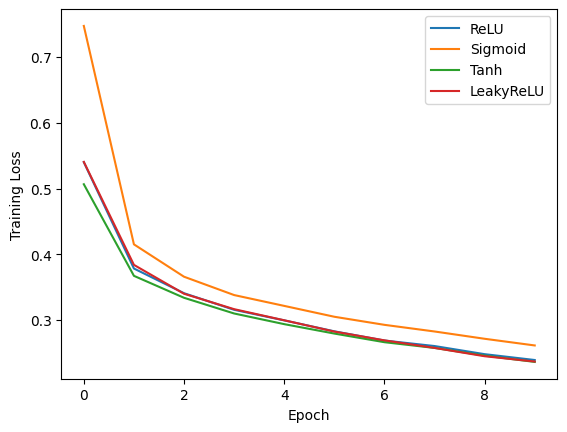

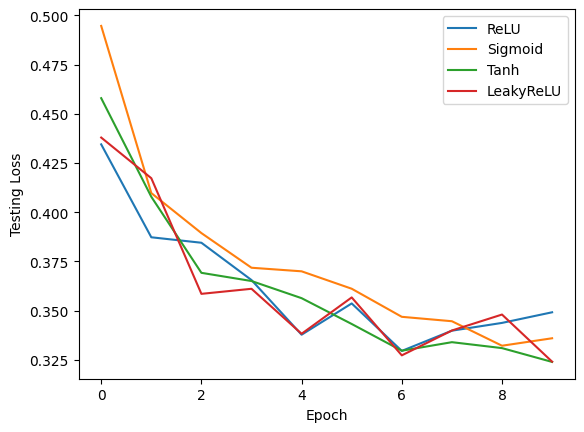

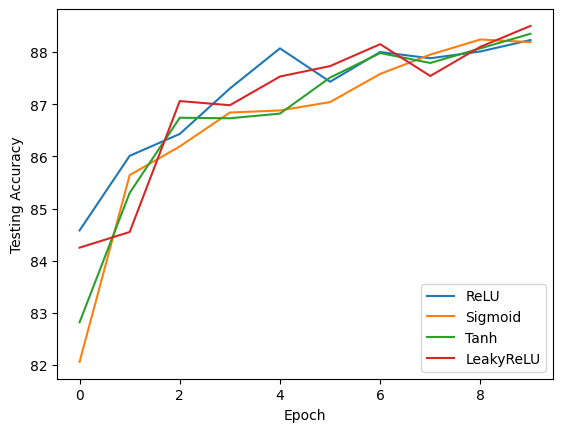

In [74]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure()
for name, data in results.items():
    plt.plot(data['train_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Plot the testing loss
plt.figure()
for name, data in results.items():
    plt.plot(data['test_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
plt.show()

# Plot the testing accuracy
plt.figure()
for name, data in results.items():
    plt.plot(data['test_accuracy_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()